# Exercise 8: Bootstrap

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import uniform

## 1. Exercise 13 in Chapter 8 of Ross (P.152).
### (a)

Since $\mu$ is unknown, we must also estimate it from the bootstrap samples. We do this by taking the mean of the mean of all bootstrap samples.

Then, for each bootstrap sample we compute the difference between the sample mean and $\mu$.

The probability $p$ can then be estimated as the proportion of these differences that fall outside the interval $(a, b)$.

### (b)

In [29]:
xi = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
n = 10
a = -5
b = 5

n_bootstrap = 10_000

bootstrap_samples = np.random.choice(xi, size=(n_bootstrap, 10))

mu = np.mean(bootstrap_samples)

bootstrap = np.sum(bootstrap_samples / n, axis=1) - mu
p = np.mean(np.abs(bootstrap) < 5)
print(f"{p = :.2f}")

p = 0.77


## 2. Exercise 15 in Chapter 8 of Ross (P.152).

In [25]:
data = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])

n = data.shape[0]
n_bootstrap = 10_000

bootstrap_samples = np.random.choice(data, size=(n_bootstrap, n))

x_bar = np.mean(bootstrap_samples, axis=1).reshape(-1, 1)

S2 = np.sum((bootstrap_samples - x_bar)**2 / (n - 1), axis=1)

var_S2 = np.var(S2)

print(f"Var(S^2) = {var_S2:.2f}")

Var(S^2) = 57.56


### 3. Write a subroutine that takes as input a “data” vector of observed values, and which outputs the median as well as the bootstrap estimate of the variance of the median, based on r = 100 bootstrap replicates. Simulate N = 200 Pareto distributed random variates with β = 1 and k = 1.05

In [31]:
def sample_pareto(n, k, beta):
    us = uniform.rvs(size=n)
    return beta * us ** (-1/k)

n = 200

sample = sample_pareto(n, k=1.05, beta=1)

bootstrap_samples = np.random.choice(sample, size=(100, n))

### (a) Compute the mean and the median (of the sample)

In [32]:
sample_mean = np.mean(sample)
sample_median = np.median(sample)

print(f"Sample mean   = {sample_mean:.2f}")
print(f"Sample median = {sample_median:.2f}")

Sample mean   = 5.46
Sample median = 1.90


### (b) Make the bootstrap estimate of the variance of the sample mean.

In [35]:
bs_var_of_sample_mean = np.var(np.mean(bootstrap_samples, axis=1))

print(f"Variance of sample mean (bootsrap estimate): {bs_var_of_sample_mean:.4f}")

Variance of sample mean (bootsrap estimate): 0.8488


### (c) Make the bootstrap estimate of the variance of the sample median.


In [36]:
bs_var_of_sample_median = np.var(np.median(bootstrap_samples, axis=1))

print(f"Variance of sample median (bootsrap estimate): {bs_var_of_sample_median:.4f}")

Variance of sample median (bootsrap estimate): 0.0124


### (d) Compare the precision of the estimated median with the precision of the estimated mean.

In [42]:
std_mean = np.sqrt(bs_var_of_sample_mean)
std_median = np.sqrt(bs_var_of_sample_median)
diff_of_stds = std_mean - std_median

print(f"Difference of std(sample mean) and std(sample median): {diff_of_stds:.4f}")

Difference of std(sample mean) and std(sample median): 0.8100


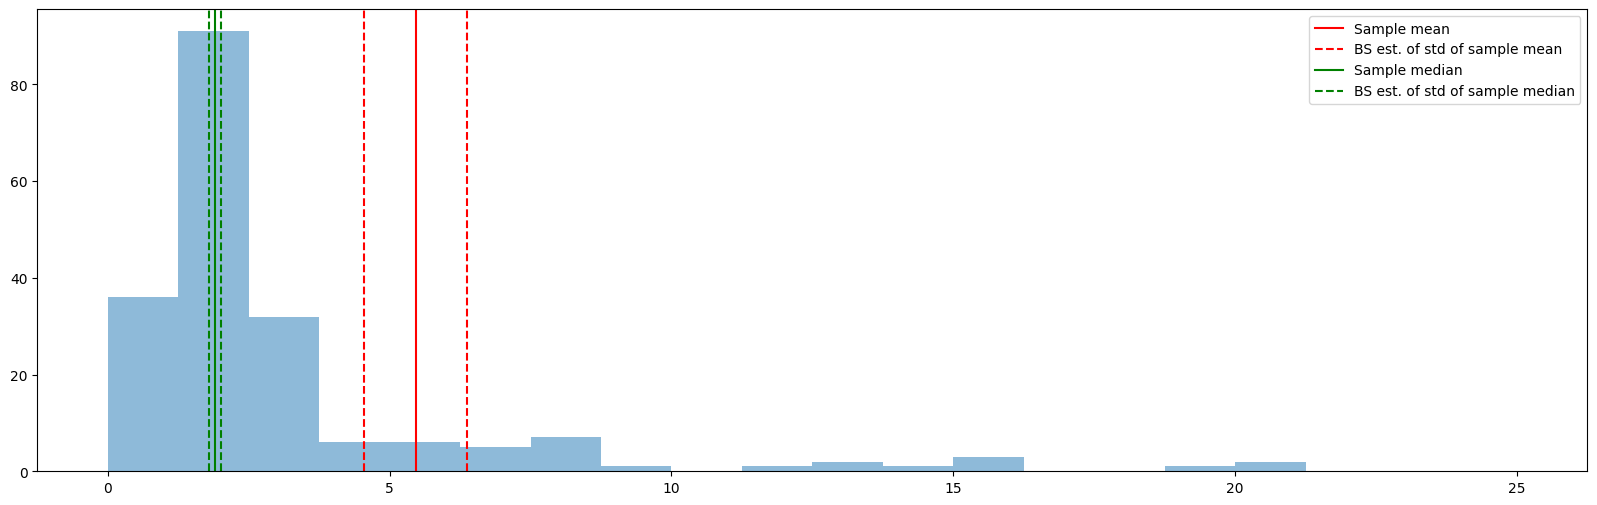

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax.hist(sample, range=(0, 25), bins=20, alpha=0.5)
ax.axvline(sample_mean, color="r", label="Sample mean")
ax.axvline(sample_mean + std_mean, color="r", linestyle="--", label="BS est. of std of sample mean")
ax.axvline(sample_mean - std_mean, color="r", linestyle="--")

ax.axvline(sample_median, color="g", label="Sample median")
ax.axvline(sample_median + std_median, color="g", linestyle="--", label="BS est. of std of sample median")
ax.axvline(sample_median - std_median, color="g", linestyle="--")

ax.legend()

plt.show()